<a href="https://colab.research.google.com/github/Adl1coder/HistogramEqualization/blob/master/MRI_Brain_Tumor_Detetection_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import imutils

import random as rn
from random import shuffle
from zipfile import ZipFile
from PIL import Image
from skimage.feature import hog
from skimage import feature, color, data
from skimage.io import imread, imshow
from skimage.feature import hog
from sklearn import datasets
from skimage import exposure
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [11]:

trn_img_path = "/content/drive/MyDrive/archive/Training"
# Now for the testing data
tst_img_path = "/content/drive/MyDrive/archive/Testing"
# Lets create 2 set of arrays for train & testing data's.
# One for to store the Image data and anther one for label details
X_train =[] # Stores the training image features
label_train = [] # Stores the training image labels
X_test = [] # Stores the testing image features
label_test = [] # Stores the testing image label
tumor_label=['pituitary', 'meningioma', 'glioma']

In [16]:
import cv2

# Assuming your Drive is mounted at /content/drive
image_path = '/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg'

# Load the image with explicit error handling
try:
    img = cv2.imread(image_path)
    if img is not None:
        # Print the shape of the image
        print(img.shape)
    else:
        print("Error: Image not loaded.")
except cv2.error as e:
    print(f"OpenCV error: {e}")


(439, 645, 3)


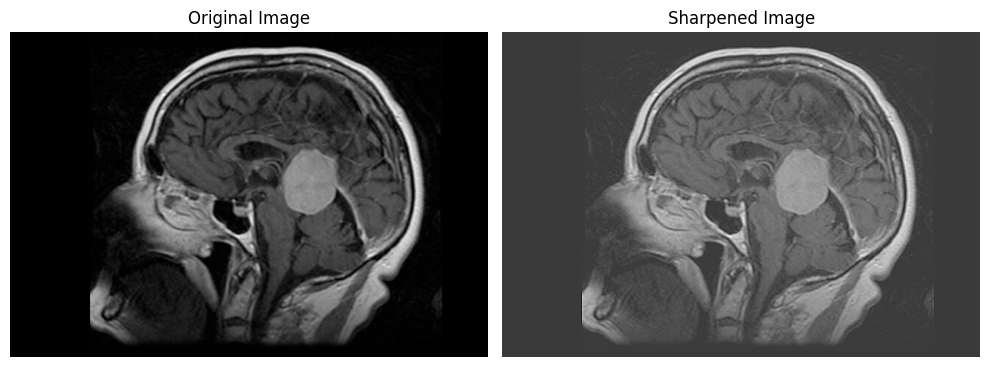

In [17]:
from matplotlib import pyplot as plt
import cv2

# Load the image using the provided path
image_path = '/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg'
image = cv2.imread(image_path)
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply Laplacian filter for sharpening
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
sharpened_image = gray_image - 0.5 * laplacian  # Adjust the factor as desired
# Display the original and sharpened images side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')  # Display as grayscale
plt.axis('off')
plt.title('Sharpened Image')

plt.tight_layout()
plt.show()

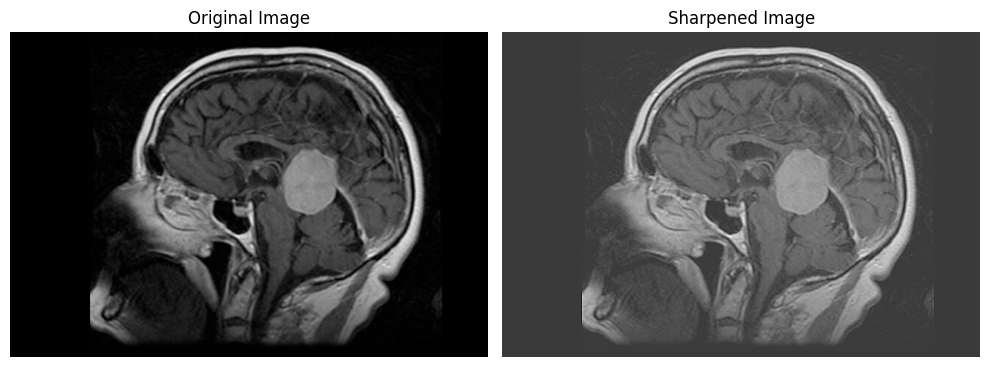

In [18]:
from matplotlib import pyplot as plt
import cv2

# Load the image using the provided path
image_path = '/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg'
image = cv2.imread(image_path)
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply Laplacian filter for sharpening
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
sharpened_image = gray_image - 0.5 * laplacian  # Adjust the factor as desired
# Display the original and sharpened images side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')  # Display as grayscale
plt.axis('off')
plt.title('Sharpened Image')

plt.tight_layout()
plt.show()

[[ 1  2  2  2 10]
 [10 20 30 40 50]]
[ 1  2  2  2 10 10 20 30 40 50]
[ 1  2  2  2 10 10 20 30 40 50]


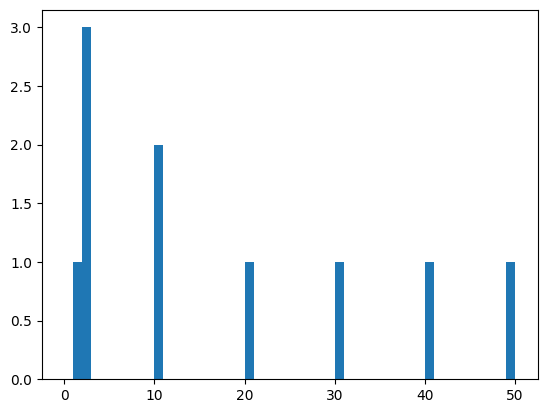

In [19]:

img=cv2.imread('/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg')
img=np.array([[1,2,2,2,10],[10,20,30,40,50]])
print(img)
print(img.ravel())
print(img.flatten())
plt.hist(img.ravel(),bins = 50, range = [0, 50])
plt.show()

[[ 1  2  2  2 10]
 [10 20 30 40 50]]
[ 1  2  2  2 10 10 20 30 40 50]
[ 1  2  2  2 10 10 20 30 40 50]


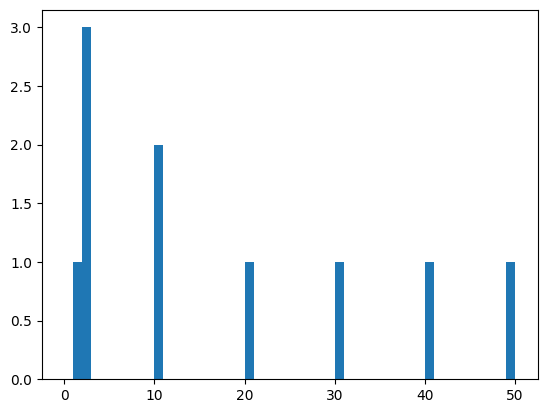

In [20]:

img=cv2.imread('/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg')
img=np.array([[1,2,2,2,10],[10,20,30,40,50]])
print(img)
print(img.ravel())
print(img.flatten())
plt.hist(img.ravel(),bins = 50, range = [0, 50])
plt.show()

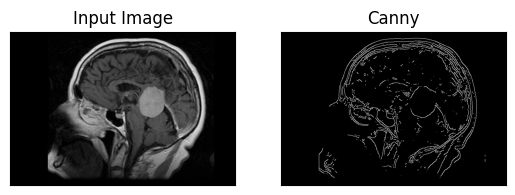

In [21]:
img=cv2.imread('/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg')
canny = cv2.Canny(img, 150, 150)

titles = ['Input Image', 'Canny']
images = [img, canny]
for i in range(2):
  plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

<ipython-input-22-45068e0d246c>:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hogfv, hog_image = hog(img, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2),


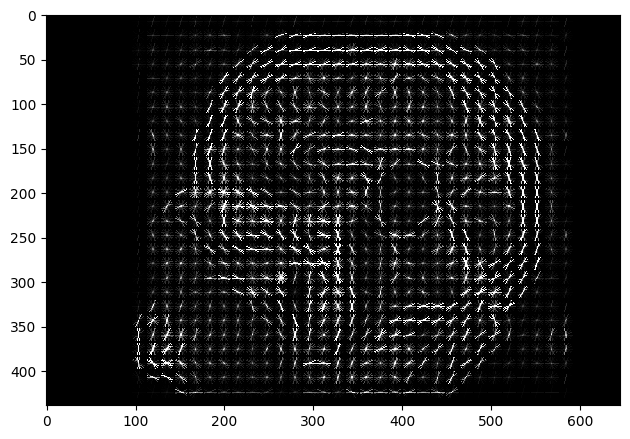

In [22]:

img=cv2.imread('/content/drive/MyDrive/Datasets/Brain Tumor/Pred/Te-me_0058.jpg')
imshow(img)
MC=True #For Color Images
#MC=False #For Grayscale Images

hogfv, hog_image = hog(img, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2),
                       visualize=True, multichannel=MC)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 5))
imshow(hog_image_rescaled)

In [24]:
hog_images = []
hog_features = []
def hog_data_extractor(jpeg_path):
    jpeg_data = cv2.imread(jpeg_path)
    jpeg_data=cv2.resize(jpeg_data,(150,150))
    fd, hog_image = hog(jpeg_data, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    return fd

In [66]:
def jpeg_to_array (tumor_type, img_root_path,data_type):
    tumor_path = os.path.join(img_root_path,tumor_type.lower())
    print('Loading ' + data_type +' images for tumor type '+tumor_type)
    for img in os.listdir(tumor_path):
        img_path = os.path.join(tumor_path,img)
        if img_path.endswith('.jpg'):
            if(data_type == 'Training'):
                X_train.append(hog_data_extractor(img_path))
                label_train.append(str(tumor_type))
            if(data_type =='Testing'):
                X_test.append(hog_data_extractor(img_path))
                label_test.append(np.array(str(tumor_type)))

In [65]:
le = LabelEncoder()
y_train = le.fit_transform(label_train)
y_test = le.fit_transform(label_test)

In [45]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

def jpeg_to_array(image_path):
    """Loads an image, converts it to grayscale, normalizes, and returns a NumPy array.

    Args:
        image_path (str): Path to the image file.

    Returns:
        np.ndarray: A NumPy array representing the preprocessed image or None if loading fails.
    """

    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            img = img.astype('float32') / 255.0  # Normalize pixel values
            return img.reshape(-1, 1)  # Reshape to a column vector (optional)
        else:
            print(f"Error: Image not found at {image_path}")
            return None  # Handle missing image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

# ... (Your code to load training image paths and labels into X_train and y_train)
print(f"X_train shape: {X_train.shape}")

X_train shape: (0, 1)


In [50]:
import cv2
import numpy as np

def jpeg_to_array(image_path):
    """Loads an image, converts it to grayscale, normalizes, and returns a NumPy array.

    Args:
        image_path (str): Path to the image file.

    Returns:
        np.ndarray: A NumPy array representing the preprocessed image or None if loading fails.
    """

    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = img.astype('float32') / 255.0  # Normalize
            print(f"Loaded image: {image_path}, shape: {img.shape}")  # Print shape
            return img.reshape(-1, 1)  # Reshape (optional)
        else:
            print(f"Image not found: {image_path}")  # Log missing image
            return None  # Handle missing image
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

# ... (Your code to load training image paths and labels into X_train and y_train)

# Print shapes before fitting (assuming X_train and y_train are lists)
print(f"X_train (before loading): {len(X_train)}")
print(f"y_train (before loading): {len(y_train)}")

X_train = [jpeg_to_array(image_path) for image_path in X_train if jpeg_to_array(image_path) is not None]  # Filter out missing images (optional)

# Print shapes after loading
print(f"X_train (after loading): {len(X_train)}")
print(f"y_train (after loading): {len(y_train)}")

# Assuming X_train and y_train have correct shapes after loading
clf = RandomForestClassifier(max_depth=20, random_state=40)



X_train (before loading): 0
y_train (before loading): 0
X_train (after loading): 0
y_train (after loading): 0


In [57]:
from sklearn.neighbors import KNeighborsClassifier
# ... (Your code to load training data)
import numpy as np

# ... (Your code to load training data into X_train and y_train)

# Convert lists to NumPy arrays (if necessary)
X_train = np.array(X_train)
y_train = np.array(y_train)

# Check shapes before fitting
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")



X_train shape: (0,)
y_train shape: (0,)
